In [1]:
import xarray as xr
import numpy as np
import pandas as pd

## In Python, plotting uses the matplotlib library

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# open data file
DIR = '/nfs/spare11/env315/data/'
filename = 'era5_an_temp_reg2_daily_2021.nc'
datafile = DIR+filename
data = xr.open_mfdataset(datafile,combine='by_coords').compute()
data

<xarray.Dataset> Size: 885MB
Dimensions:  (lat: 91, lon: 180, plev: 37, time: 365)
Coordinates:
  * lat      (lat) float64 728B 90.0 88.0 86.0 84.0 ... -84.0 -86.0 -88.0 -90.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * plev     (plev) float64 296B 100.0 200.0 300.0 ... 9.5e+04 9.75e+04 1e+05
  * time     (time) datetime64[ns] 3kB 2021-01-01T09:00:00 ... 2021-12-31T09:...
Data variables:
    var130   (time, plev, lat, lon) float32 885MB 264.1 264.1 ... 267.5 267.5
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Sat Aug  6 23:22:23 2022: ncrcat /net/cfc/s2s/zhengwu/Datas...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...
    NCO:          netCDF Operators version 5.0.0 (Homepage = http://nco.sf.ne...

#### Pay attention that the data type is xarray.Dataset
#### To use the data, we should use data.var130, where "vaar130" is the name of the variable.

In [4]:
# Now see what the data type is
data = data.var130
data

<xarray.DataArray 'var130' (time: 365, plev: 37, lat: 91, lon: 180)> Size: 885MB
array([[[[264.1321 , 264.1321 , 264.1321 , ..., 264.1321 , 264.1321 ,
          264.1321 ],
         [266.73904, 266.77078, 266.7947 , ..., 266.5994 , 266.6536 ,
          266.70047],
         [271.13065, 271.17215, 271.19705, ..., 270.90506, 270.99588,
          271.07156],
         ...,
         [285.77713, 285.74393, 285.71365, ..., 285.8914 , 285.85135,
          285.81326],
         [286.0032 , 285.98416, 285.9656 , ..., 286.06326, 286.04227,
          286.02225],
         [286.74344, 286.74344, 286.74344, ..., 286.74344, 286.74344,
          286.74344]],

        [[258.1566 , 258.1566 , 258.1566 , ..., 258.1566 , 258.1566 ,
          258.1566 ],
         [258.27377, 258.41537, 258.55405, ..., 257.82895, 257.9808 ,
          258.12973],
         [261.8939 , 262.25278, 262.6043 , ..., 260.7811 , 261.1566 ,
          261.52768],
...
         [267.0744 , 266.97235, 266.85907, ..., 267.2907 , 267.2331 ,
          267.16083],
         [267.23553, 267.20575, 267.17157, ..., 267.30194, 267.28436,
          267.2624 ],
         [266.278  , 266.278  , 266.278  , ..., 266.278  , 266.278  ,
          266.278  ]],

        [[249.42935, 249.42935, 249.42935, ..., 249.42935, 249.42935,
          249.42935],
         [250.52505, 250.4816 , 250.44302, ..., 250.67154, 250.6193 ,
          250.57095],
         [251.43277, 251.39029, 251.34097, ..., 251.52945, 251.50162,
          251.46988],
         ...,
         [268.3439 , 268.2438 , 268.1315 , ..., 268.56314, 268.50455,
          268.4318 ],
         [268.56216, 268.52994, 268.49527, ..., 268.631  , 268.61295,
          268.5895 ],
         [267.52652, 267.52652, 267.52652, ..., 267.52652, 267.52652,
          267.52652]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 728B 90.0 88.0 86.0 84.0 ... -84.0 -86.0 -88.0 -90.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * plev     (plev) float64 296B 100.0 200.0 300.0 ... 9.5e+04 9.75e+04 1e+05
  * time     (time) datetime64[ns] 3kB 2021-01-01T09:00:00 ... 2021-12-31T09:...
Attributes:
    table:         128
    cell_methods:  time: mean

In [5]:
# Check the dimension and the size of the data again, understand what the data size and the corresponding coordinates
print(data.shape)
# 365 is the size of time dim, 37 is the size of plev dim
# 91 is the size of the lat dim, 180 is the size of lon dim

(365, 37, 91, 180)


### Now plot the line plot for time series: variable changes with time

In [6]:
"""
This is a multiline comment.
It can span multiple lines. 
Line plot is a 1-D plot, which means we need to fix other dimensions 
and only plot data change along one dimension.
In this case, we fix the time dimension.
First, we need to select data to reduce the dimension to 1-D.
Say we want to look at how the temperature of Albany at 1000 hPa changes with time.
Let's use 42N and 74W to represent Albany.
"""

temp_albany = data.sel(lat=42,lon=286,plev=100000)

# Now look at the size of temp_albany
print(temp_albany.shape)

(365,)


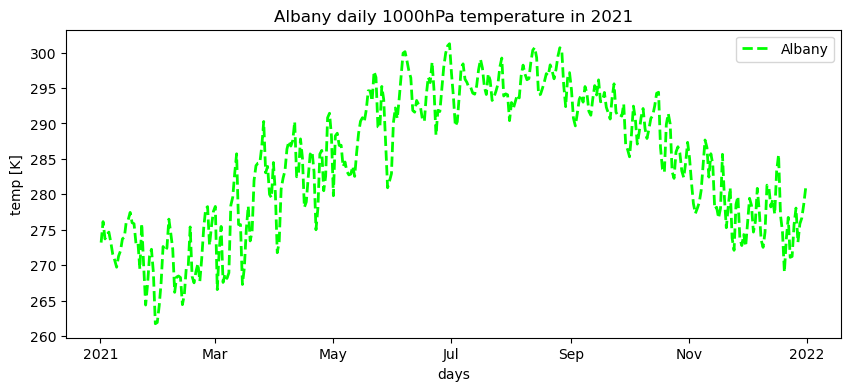

In [29]:
# creates a new figure object with a specific size
# You can change the figure size by changing the number for figsize
# the first number represents the width of the figure in inches
# the second number represents the height of the figure in inches
figure = plt.figure(figsize=(10,4))

# There are two ways to plot the time series
# Method 1: using xarray
temp_albany.plot(color='lime',linestyle='dashed',linewidth=2,label='Albany') # to define line color
# list of colors can be found here: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.legend()
plt.xlabel('days')
plt.ylabel('temp [K]')
plt.title('Albany daily 1000hPa temperature in 2021')
plt.savefig('albany_temp1000hpa.png') 

<class 'numpy.ndarray'> (365,)


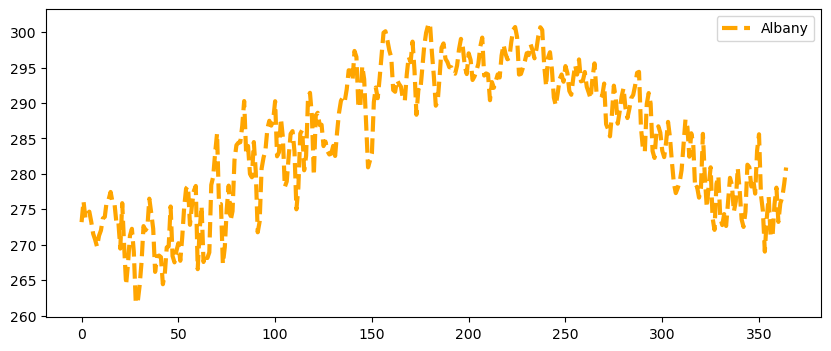

In [28]:
figure = plt.figure(figsize=(10,4))

# Method 2: using numpy array
# convert the data to numpy array first
temp_albany_np = temp_albany.values
print(type(temp_albany_np),np.shape(temp_albany_np))
plt.plot(temp_albany_np,'orange',linestyle='dashed',linewidth=3,label='Albany')
plt.legend()
plt.savefig('albany_temp1000hpa.png') 

### Compare the differences between the two plots, discuss what are the differences between these two methods

Text(0.5, 1.0, 'Albany daily 1000hPa temperature in 2021')

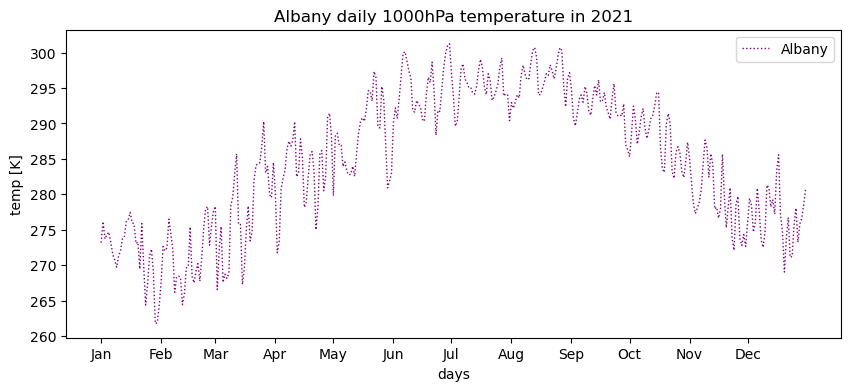

In [32]:
# Make the second plot similar to the first plot
figure = plt.figure(figsize=(10,4))
days = np.arange(1, 366)
plt.plot(days,temp_albany_np,'purple',linestyle='dotted',linewidth=1,label='Albany')
plt.legend()

# Set x-axis labels
plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('days')
plt.ylabel('temp [K]')
plt.title('Albany daily 1000hPa temperature in 2021')

### Now plot the map (longitude x latitude): variable spatial pattern

In [7]:
"""
Map plot is a 2-D plot, which means we need to fix other dimensions 
and keep the longitude and latitude dimensions of the data.
First, we need to select data to reduce the dimension to 2-D.
Say we want to look at how the global temperature at 1000 hPa on January 1st 2021.
"""

temp_1000hpa = data.sel(plev=100000,time='2021-01-01')

# Now look at the size of temp_1000hpa
print(temp_1000hpa.shape)

(1, 91, 180)


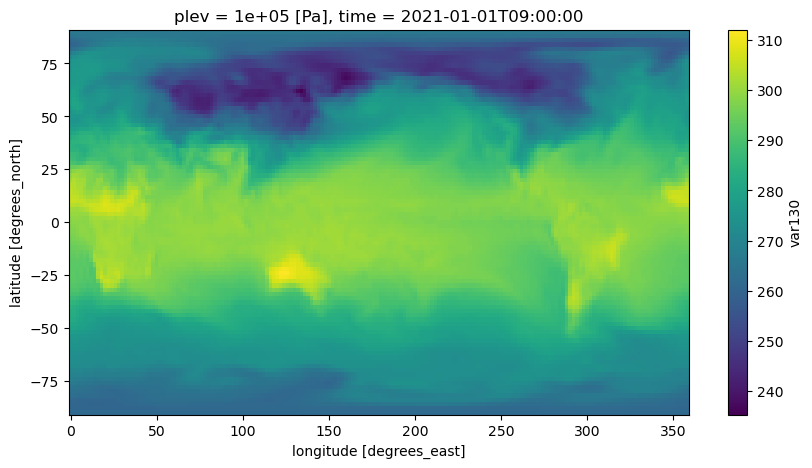

In [8]:
# Again, there are two ways to plot the map
# Method 1: using xarray and the default setting
figure = plt.figure(figsize=(10,5))
temp_1000hpa.plot()

Text(0.5, 1.0, 'Global 1000hPa temperature on 2021-01-01')

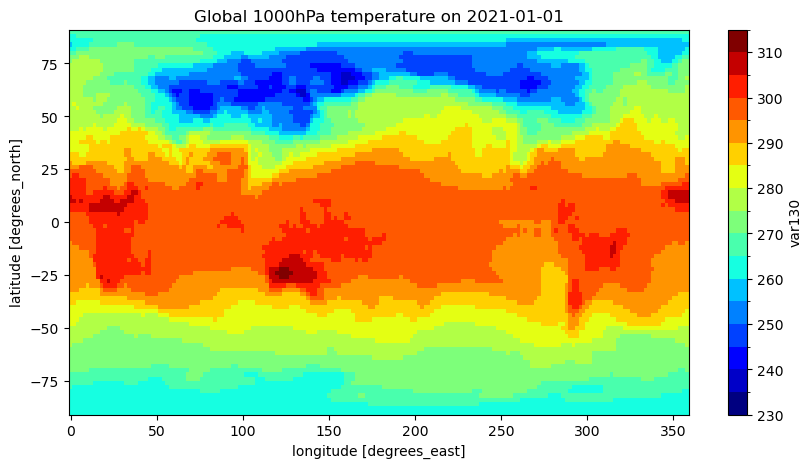

In [9]:
# Method 1: using xarray and the default setting
# change or add more things to the default setting
figure = plt.figure(figsize=(10,5))

# first, define contour levels and color map
temp_1000hpa.plot(cmap='jet',levels=np.arange(230,320,5))
plt.title('Global 1000hPa temperature on 2021-01-01')

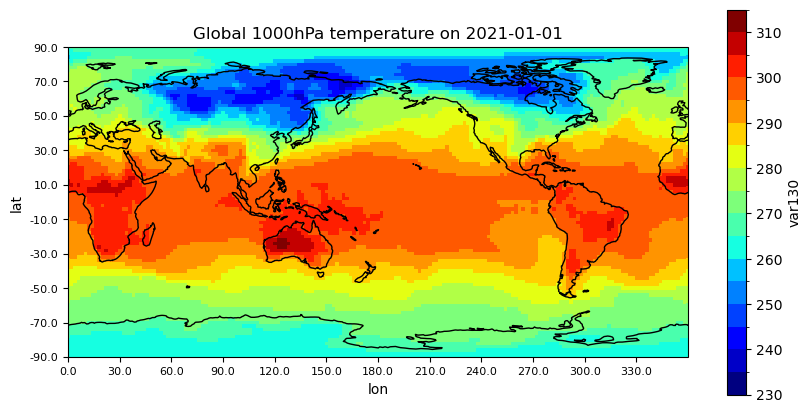

In [10]:
# Method 1: using xarray and the default setting
# change or add more things to the default setting
figure = plt.figure(figsize=(10,5))
# second, add the continents
ax = figure.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))
temp_1000hpa.plot(cmap='jet',levels=np.arange(230,320,5),ax=ax, transform=ccrs.PlateCarree())
plt.title('Global 1000hPa temperature on 2021-01-01')

long = data.lon.values[0:180:15]
latg = data.lat.values[0:91:10]
ax.set_xticks(long, crs=ccrs.PlateCarree())
ax.set_yticks(latg, crs=ccrs.PlateCarree())
ax.set_xticklabels(long, fontsize=8)
ax.set_yticklabels(latg, fontsize=8)
ax.set_ylabel('lat', fontsize=10)
ax.set_xlabel('lon', fontsize=10)

# first way to add continents using the default setting
ax.add_feature(cf.LAND)
ax.coastlines()

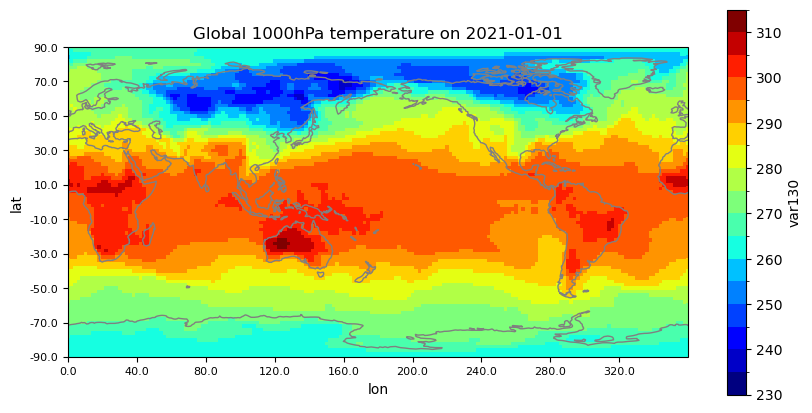

In [11]:
# Method 1: using xarray and the default setting
# change or add more things to the default setting
figure = plt.figure(figsize=(10,5))
# second, add the continents
ax = figure.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))
temp_1000hpa.plot(cmap='jet',levels=np.arange(230,320,5),ax=ax, transform=ccrs.PlateCarree())
plt.title('Global 1000hPa temperature on 2021-01-01')

long = data.lon.values[0:180:20]
latg = data.lat.values[0:91:10]
ax.set_xticks(long, crs=ccrs.PlateCarree())
ax.set_yticks(latg, crs=ccrs.PlateCarree())
ax.set_xticklabels(long, fontsize=8)
ax.set_yticklabels(latg, fontsize=8)
ax.set_ylabel('lat', fontsize=10)
ax.set_xlabel('lon', fontsize=10)

# second way to add continents using your own definition
# define the coastlines, the color (#000000) and the resolution (110m)
feature = cf.NaturalEarthFeature(
    name='coastline', category='physical',
    scale='110m',
    edgecolor='grey', facecolor='none')
ax.add_feature(feature)

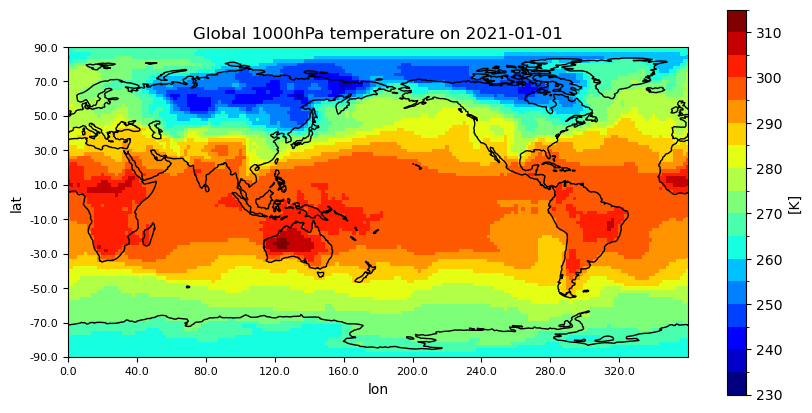

In [12]:
# Method 1: using xarray and the default setting
# change or add more things to the default setting
figure = plt.figure(figsize=(10,5))
ax = figure.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))
# third, use self-defined color bar
hm = temp_1000hpa.plot(cmap='jet',levels=np.arange(230,320,5),ax=ax, transform=ccrs.PlateCarree(),
                      add_colorbar=False)
plt.title('Global 1000hPa temperature on 2021-01-01')

long = data.lon.values[0:180:20]
latg = data.lat.values[0:91:10]
ax.set_xticks(long, crs=ccrs.PlateCarree())
ax.set_yticks(latg, crs=ccrs.PlateCarree())
ax.set_xticklabels(long, fontsize=8)
ax.set_yticklabels(latg, fontsize=8)
ax.set_ylabel('lat', fontsize=10)
ax.set_xlabel('lon', fontsize=10)

ax.add_feature(cf.LAND)
ax.coastlines()

# define your own colorbar feature
cbar = plt.colorbar(hm, orientation='vertical',pad=0.05)
cbar.ax.tick_params(labelsize=10) 
colorLabel='[K]'
cbar.set_label(label=colorLabel,fontsize=10)

<class 'numpy.ndarray'> (91, 180)


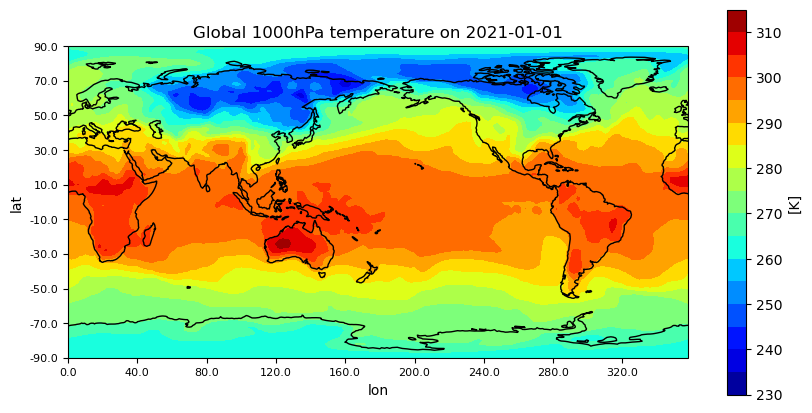

In [18]:
# Method 2: using numpy array
temp_1000hpa_np = np.squeeze(temp_1000hpa.values)
print(type(temp_1000hpa_np),np.shape(temp_1000hpa_np))

figure = plt.figure(figsize=(10,5))
ax = figure.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))
# third, use self-defined color bar
hm = ax.contourf(data.lon.values,data.lat.values,temp_1000hpa_np,cmap='jet',levels=np.arange(230,320,5),transform=ccrs.PlateCarree())
# except for the "ax.contourf" command line, other commands are the same as using xarray
plt.title('Global 1000hPa temperature on 2021-01-01')

long = data.lon.values[0:180:20]
latg = data.lat.values[0:91:10]
ax.set_xticks(long, crs=ccrs.PlateCarree())
ax.set_yticks(latg, crs=ccrs.PlateCarree())
ax.set_xticklabels(long, fontsize=8)
ax.set_yticklabels(latg, fontsize=8)
ax.set_ylabel('lat', fontsize=10)
ax.set_xlabel('lon', fontsize=10)

ax.add_feature(cf.LAND)
#ax.add_feature(cf.STATES)
ax.coastlines()

# define your own colorbar feature
cbar = plt.colorbar(hm, orientation='vertical',pad=0.05)
cbar.ax.tick_params(labelsize=10) 
colorLabel='[K]'
cbar.set_label(label=colorLabel,fontsize=10)

### Now plot the cross-section (latitude x pressure)

In [8]:
"""
Cross section is a 2-D plot, which means we need to fix other dimensions 
and keep the latitude and height (or pressure) dimensions of the data.
First, we need to select data to reduce the dimension to 2-D.
Say we want to look at how the temperature at 90W on January 1st 2021.
"""

temp = np.squeeze(data.sel(lon=260,time='2021-02-12'))

# Now look at the size of temp_1000hpa
print(temp.shape)

(37, 91)


/tmp/ipykernel_3286816/1285768897.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabel)


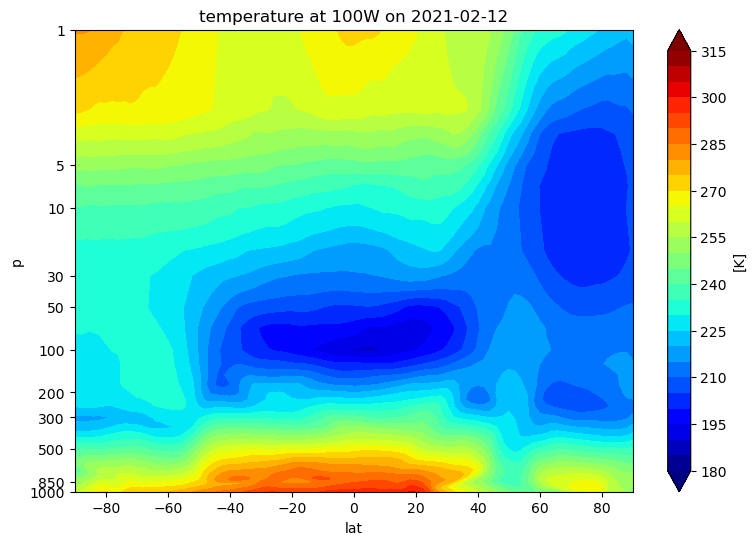

In [11]:
figure = plt.figure(figsize=(9,6))
ax = figure.add_subplot(1,1,1)
h = ax.contourf(data.lat.values,data.plev.values/100,temp, levels=np.arange(180,320,5), cmap='jet', extend='both')
ax.set_title('temperature at 100W on 2021-02-12', fontsize=12)
plt.xlabel("lat")
plt.ylabel("p")
# Adjust the y-axis to be logarithmic
ylabel = np.array([1000,850,500,300,200])
ylabel = np.concatenate([ylabel,np.array([100,50,30])])
ylabel = np.concatenate([ylabel,np.array([10,5,1])])
ax.set_yscale('symlog')
ax.set_yticklabels(ylabel)
ax.set_ylim([1000,1])
ax.set_yticks(ylabel)

# define your own colorbar feature
cbar = plt.colorbar(h, orientation='vertical',pad=0.05)
cbar.ax.tick_params(labelsize=10) 
colorLabel='[K]'
cbar.set_label(label=colorLabel,fontsize=10)
plt.show() 